<a href="https://colab.research.google.com/github/devjaime/data_science_escalab/blob/main/tarea01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Carga de archivo

In [19]:
import pandas as pd
import numpy as np
from google.colab import  files
#files.upload("")
#covid = pd.read_csv("country_vaccinations.csv")
url = 'https://raw.githubusercontent.com/devjaime/data_science_escalab/main/country_vaccinations.csv'
covid = pd.read_csv(url, index_col=0)


limpieza de datos y revision de estos

In [40]:
covid.shape # tamano de la bd
covid.head(10) # verificar los 10 primeros datos cargados
covid.tail(10) 
covid.columns
covid.dtypes
covid1=covid.drop(['iso_code','source_name','source_website','vaccines'],axis=1) # eliminacion de datos no necesarios
covid1
covid1.isnull().any()
covid1.fillna(0, inplace=True)
covid1.isnull().any()
covid1.rename(columns={'country':'Pais'}, inplace = True)
covid1.rename(columns={'date':'Fecha'},inplace = True)
covid1.rename(columns={'total_vaccinations':'Numero total de vacunas'},inplace = True)
covid1.rename(columns={'people_vaccinated':'Numero total de personas vacunadas'},inplace = True)
covid1.rename(columns={'people_fully_vaccinated':'Numero total de personas totalmente vacunadas'},inplace = True)
covid1.rename(columns={'daily_vaccinations_raw':'Vacunaciones diarias (en bruto)'},inplace = True)
covid1.rename(columns={'daily_vaccinations':'Vacunaciones diarias'},inplace = True)
covid1.rename(columns={'total_vaccinations_per_hundred':'Vacunaciones totales por cien'},inplace = True)
covid1.rename(columns={'people_vaccinated_per_hundred':'Numero total de personas vacunadas por cada cien'},inplace = True)
covid1.rename(columns={'people_fully_vaccinated_per_hundred':'Numero total de personas totalmente vacunadas por cada cien'},inplace = True)
covid1.rename(columns={'daily_vaccinations_per_million':'Vacunaciones diarias por millon'},inplace = True)
covid1
covid2=covid1.reindex(columns=['Pais','Fecha','Vacunaciones diarias (en bruto)','Vacunaciones diarias','Numero total de vacunas','Vacunaciones totales por cien','Numero total de personas vacunadas','Numero total de personas vacunadas por cada cien','Numero total de personas totalmente vacunadas','Numero total de personas totalmente vacunadas por cada cien','Vacunaciones diarias por millon'])
covid2


,Pais,Fecha,Vacunaciones diarias (en bruto),Vacunaciones diarias,Numero total de vacunas,Vacunaciones totales por cien,Numero total de personas vacunadas,Numero total de personas vacunadas por cada cien,Numero total de personas totalmente vacunadas,Numero total de personas totalmente vacunadas por cada cien,Vacunaciones diarias por millon
country,,,,,,,,,,,
Afghanistan,NaN,2021-02-22,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.00,0.0
Afghanistan,NaN,2021-02-23,0.0,1367.0,0.0,0.00,0.0,0.00,0.0,0.00,34.0
Afghanistan,NaN,2021-02-24,0.0,1367.0,0.0,0.00,0.0,0.00,0.0,0.00,34.0
Afghanistan,NaN,2021-02-25,0.0,1367.0,0.0,0.00,0.0,0.00,0.0,0.00,34.0
Afghanistan,NaN,2021-02-26,0.0,1367.0,0.0,0.00,0.0,0.00,0.0,0.00,34.0
...,...,...,...,...,...,...,...,...,...,...,...
Zimbabwe,NaN,2021-12-01,28498.0,21938.0,6640440.0,44.00,3809900.0,25.24,2830540.0,18.76,1454.0
Zimbabwe,NaN,2021-12-02,41671.0,24152.0,6682111.0,44.28,3830488.0,25.38,2851623.0,18.89,1600.0
Zimbabwe,NaN,2021-12-03,27984.0,23681.0,6710095.0,44.46,3845246.0,25.48,2864849.0,18.98,1569.0


Cantidad de personas vacunadas a la fecha para cada país, ordenados de menor a mayor (people_vaccinated)

In [53]:
grup=covid2.groupby("country").agg({
    "Numero total de personas vacunadas": "max"

}).sort_values(by=['Numero total de personas vacunadas'])
grup


,Numero total de personas vacunadas
country,
Pitcairn,4.700000e+01
Tokelau,9.680000e+02
Niue,1.202000e+03
Montserrat,1.531000e+03
Burundi,1.834000e+03
...,...
Indonesia,1.427009e+08
Brazil,1.646048e+08
United States,2.360189e+08


In [73]:
#Cantidad de vacunas diarias en Chile, desde la primera fecha hasta la última (daily_vaccinations_raw) vacunaciones diarias en bruto
df_g= covid2.groupby('Numero total de vacunas').mean()
df_t = df_g.query('country == "Chile"')
df_t
grup_t=df_t.groupby("country").agg({
    "Vacunaciones diarias (en bruto)": "sum"

})
grup_t


,Vacunaciones diarias (en bruto)
country,
Chile,119708.648415


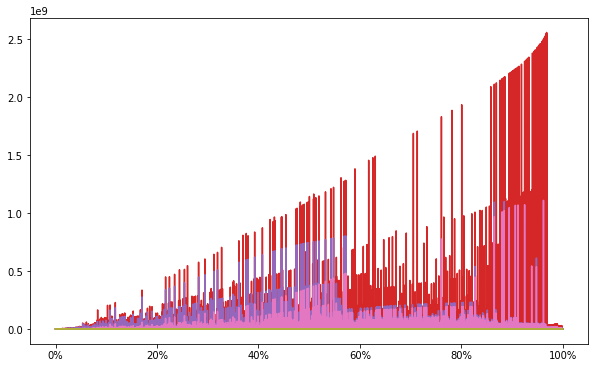

In [82]:
#Mostrar porcentualmente y en bruto (en un mismo gráfico) el porcentaje/cantidad de tipos de vacuna (vaccines)
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as mtick

data = covid2.groupby('Vacunaciones totales por cien').mean()
perc = np.linspace(0,100,len(data))

fig = plt.figure(1, (10,6))
ax = fig.add_subplot(1,1,1)

ax.plot(perc, data)

fmt = '%.0f%%' # Format you want the ticks, e.g. '40%'
xticks = mtick.FormatStrFormatter(fmt)
ax.xaxis.set_major_formatter(xticks)

plt.show()

In [106]:
# Cantidad de días que ha durado el proceso de vacunación para cada país
grup2=covid2.groupby("country").agg({
    "Fecha": "sum"

})
grup2



,Fecha
country,
Afghanistan,2021-02-222021-02-232021-02-242021-02-252021-0...
Albania,2021-01-102021-01-112021-01-122021-01-132021-0...
Algeria,2021-01-292021-01-302021-01-312021-02-012021-0...
Andorra,2021-01-252021-01-262021-01-272021-01-282021-0...
Angola,2021-03-012021-03-022021-03-032021-03-042021-0...
...,...
Wales,2021-01-102021-01-112021-01-122021-01-132021-0...
Wallis and Futuna,2021-03-232021-03-242021-03-252021-03-262021-0...
Yemen,2021-05-092021-05-102021-05-112021-05-122021-0...


In [118]:
#Cantidad de vacunados diarios para los países: Chile, Argentina y Brasil en un mismo gráfico (daily_vaccinations_raw) 

import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
df_t = covid.query('country == "Chile" or country == "Argentina" or country == "Brasil"')
df_t
fig = px.line(df_t, x='date', y='daily_vaccinations_raw', 
              )
fig.update_layout(title="Line plot for Total Vaccinations",
                 xaxis_title="Date",
                 yaxis_title="Total Vaccinations")
fig.show()